<a href="https://colab.research.google.com/github/alexkotsscott/Athena/blob/main/athena_work_bilal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
# extracting the file from zipfile
import zipfile
a = zipfile.ZipFile("/content/dummy-motor-data-conversion-20230718.zip")
a.extractall()
a.close()

FileNotFoundError: ignored

In [3]:
!kaggle datasets download -d sashakotenko/dummy-motor-data-conversion-20230718

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.4 MB/s eta 0:00:00


#Importing dependencies

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#car_data = pd.read_csv("/content/Dummy_Motor_Data_Conversion_20230718.csv")
car_data = pd.read_csv("/content/drive/MyDrive/Athena/Insurance/Motor/Data/Kaggle/Dummy_Motor_Data_Conversion_20230725_kaggle_train.csv")

In [9]:
car_data.head()

,Customer_ID,Purchase_Date,Cover_Start_Date,Cover_End_Date,Period_of_Cover,LOB,Broker,Age,Occupation,Income,...,Transmission,Coverage_Type,Area_Type,Insurance_Type,Payment_Type,Traffic_Violations,DUI,Education,Licence,Channel
0,15c58f38e984a0a6ec04079a64744f57,2022-03-21,2022-08-16,2023-08-16,365,Private_Motor,Athena_Family,54,Firefighter,30244,...,Automatic,TPFT,Urban,Family,Monthly,1,1,Bachelors,EU/EEA,Affinity
1,0dbb8bd243274418e88fb254ba0f9f56,2022-07-08,2023-05-29,2024-05-28,365,Private_Motor,Athena_Lite,49,Farmer,154956,...,Manual,TPO,Urban,Family,Annually,1,1,Doctorate,EU/EEA,Affinity
2,2be4737e76135ba890cc9e8ec02936cc,2021-03-27,2021-11-30,2022-11-30,365,Private_Motor,Athena_Lite,33,Pharmacist,38570,...,Manual,PIP,SubUrban,Commercial,Monthly,1,1,Vocational,International,Aggregator
3,515ee35697dfc8ebc1a633396f2350ff,2020-12-06,2021-08-25,2022-08-25,365,Private_Motor,Athena_Family,31,Flight Attendant,107224,...,Automatic,TPO,Rural,Family,Monthly,1,1,Masters,EU/EEA,Renewal
4,3774e9d7791f6fb5d92867a2f5491b9f,2021-07-24,2021-09-08,2022-09-08,365,Private_Motor,Athena_Family,59,Financial Analyst,314954,...,Manual,TPFT,SubUrban,Individual,Monthly,1,1,Doctorate,Full,Renewal


In [10]:
car_data.shape

(100000, 59)

In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 59 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Customer_ID                     100000 non-null  object 
 1   Purchase_Date                   100000 non-null  object 
 2   Cover_Start_Date                100000 non-null  object 
 3   Cover_End_Date                  100000 non-null  object 
 4   Period_of_Cover                 100000 non-null  int64  
 5   LOB                             100000 non-null  object 
 6   Broker                          100000 non-null  object 
 7   Age                             100000 non-null  int64  
 8   Occupation                      100000 non-null  object 
 9   Income                          100000 non-null  int64  
 10  Marital_Status                  100000 non-null  object 
 11  Premium                         100000 non-null  float64
 12  Vehicle_Type     

In [12]:
car_data.select_dtypes(include='object').nunique()

Customer_ID          100000
Purchase_Date          1263
Cover_Start_Date        912
Cover_End_Date          912
LOB                       1
Broker                    3
Occupation               30
Marital_Status            6
Vehicle_Type              5
Vehicle_Brand            12
Vehicle_Use               6
Daytime_Parking           7
Overnight_Parking         6
Fuel_Type                 3
Transmission              3
Coverage_Type             4
Area_Type                 3
Insurance_Type            3
Payment_Type              2
Education                 5
Licence                   3
Channel                   7
dtype: int64

In [13]:
car_data.describe()

,Period_of_Cover,Age,Income,Premium,Vehicle_Age,Vehicle_Value,Vehicle_Mileage,NCD,Number_of_Drivers,Driver1_Age,...,Saftey_ESC,Saftey_TCS,Saftey_Rear_Camera,Antitheft_Immobilizer,Antitheft_Alarm,Antitheft_Remote_Locking,Antitheft_Steering_Wheel_Locks,Antitheft_GPS_Tracking,Traffic_Violations,DUI
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,365.0,47.738350,234552.548830,2803.153972,7.757680,44530.137228,37843.913017,0.463220,1.200290,47.738350,...,0.500320,0.497180,0.999800,0.50169,0.502000,0.501300,0.499530,0.99979,0.999770,0.999910
std,0.0,18.303842,253447.033086,2590.531877,4.236777,24254.312599,57569.728987,0.498648,0.400219,18.303842,...,0.500002,0.499995,0.014141,0.50000,0.499998,0.500001,0.500002,0.01449,0.015164,0.009486
min,365.0,18.000000,15000.000000,300.015790,0.000000,14000.365998,300.000781,0.000000,1.000000,18.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,365.0,33.000000,42365.750000,727.168646,5.000000,23402.134993,1675.121506,0.000000,1.000000,33.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
50%,365.0,46.000000,121985.500000,1764.092586,7.000000,38511.262961,9050.699568,0.000000,1.000000,46.000000,...,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000
75%,365.0,60.000000,349314.500000,4233.946666,11.000000,62481.493353,48352.241519,1.000000,1.000000,60.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,365.0,99.000000,999984.000000,9999.182032,20.000000,99997.364595,249955.250216,1.000000,2.000000,99.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
car_data.duplicated().sum()

0

In [15]:
car_data.corr()['Sale_Flag']

<ipython-input-15-b7c2e157157b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_data.corr()['Sale_Flag']


Period_of_Cover                        NaN
Age                              -0.008563
Income                            0.001659
Premium                           0.001715
Vehicle_Age                       0.004285
Vehicle_Value                     0.001102
Vehicle_Mileage                  -0.003402
NCD                              -0.004910
Number_of_Drivers                -0.005656
Driver1_Age                      -0.008563
Driver2_Age                       0.001566
Driver1_LicenceYears             -0.002949
Driver2_LicenceYears              0.006275
Driver1_LicenceRecord            -0.002189
Driver2_LicenceRecord            -0.002294
Driver1_Claims_Count              0.004941
Driver2_Claims_Count              0.002869
Location_Risk                    -0.002335
Telematics                        0.002663
Credit_Score                      0.004035
Fraud_Risk_Score                 -0.001700
CCJs                              0.001762
Sale_Flag                         1.000000
Claims_Coun

In [16]:
new_data = car_data.drop(columns=['Driver1_LicenceYears','Driver2_LicenceYears','Driver1_LicenceRecord','Driver2_LicenceRecord'],axis=1)

In [17]:
new_data.head()

,Customer_ID,Purchase_Date,Cover_Start_Date,Cover_End_Date,Period_of_Cover,LOB,Broker,Age,Occupation,Income,...,Transmission,Coverage_Type,Area_Type,Insurance_Type,Payment_Type,Traffic_Violations,DUI,Education,Licence,Channel
0,15c58f38e984a0a6ec04079a64744f57,2022-03-21,2022-08-16,2023-08-16,365,Private_Motor,Athena_Family,54,Firefighter,30244,...,Automatic,TPFT,Urban,Family,Monthly,1,1,Bachelors,EU/EEA,Affinity
1,0dbb8bd243274418e88fb254ba0f9f56,2022-07-08,2023-05-29,2024-05-28,365,Private_Motor,Athena_Lite,49,Farmer,154956,...,Manual,TPO,Urban,Family,Annually,1,1,Doctorate,EU/EEA,Affinity
2,2be4737e76135ba890cc9e8ec02936cc,2021-03-27,2021-11-30,2022-11-30,365,Private_Motor,Athena_Lite,33,Pharmacist,38570,...,Manual,PIP,SubUrban,Commercial,Monthly,1,1,Vocational,International,Aggregator
3,515ee35697dfc8ebc1a633396f2350ff,2020-12-06,2021-08-25,2022-08-25,365,Private_Motor,Athena_Family,31,Flight Attendant,107224,...,Automatic,TPO,Rural,Family,Monthly,1,1,Masters,EU/EEA,Renewal
4,3774e9d7791f6fb5d92867a2f5491b9f,2021-07-24,2021-09-08,2022-09-08,365,Private_Motor,Athena_Family,59,Financial Analyst,314954,...,Manual,TPFT,SubUrban,Individual,Monthly,1,1,Doctorate,Full,Renewal


#Exploratory data analysis ---------------> EDA



```
# This is formatted as code
```

###Univariate analysis

###Categorical cols

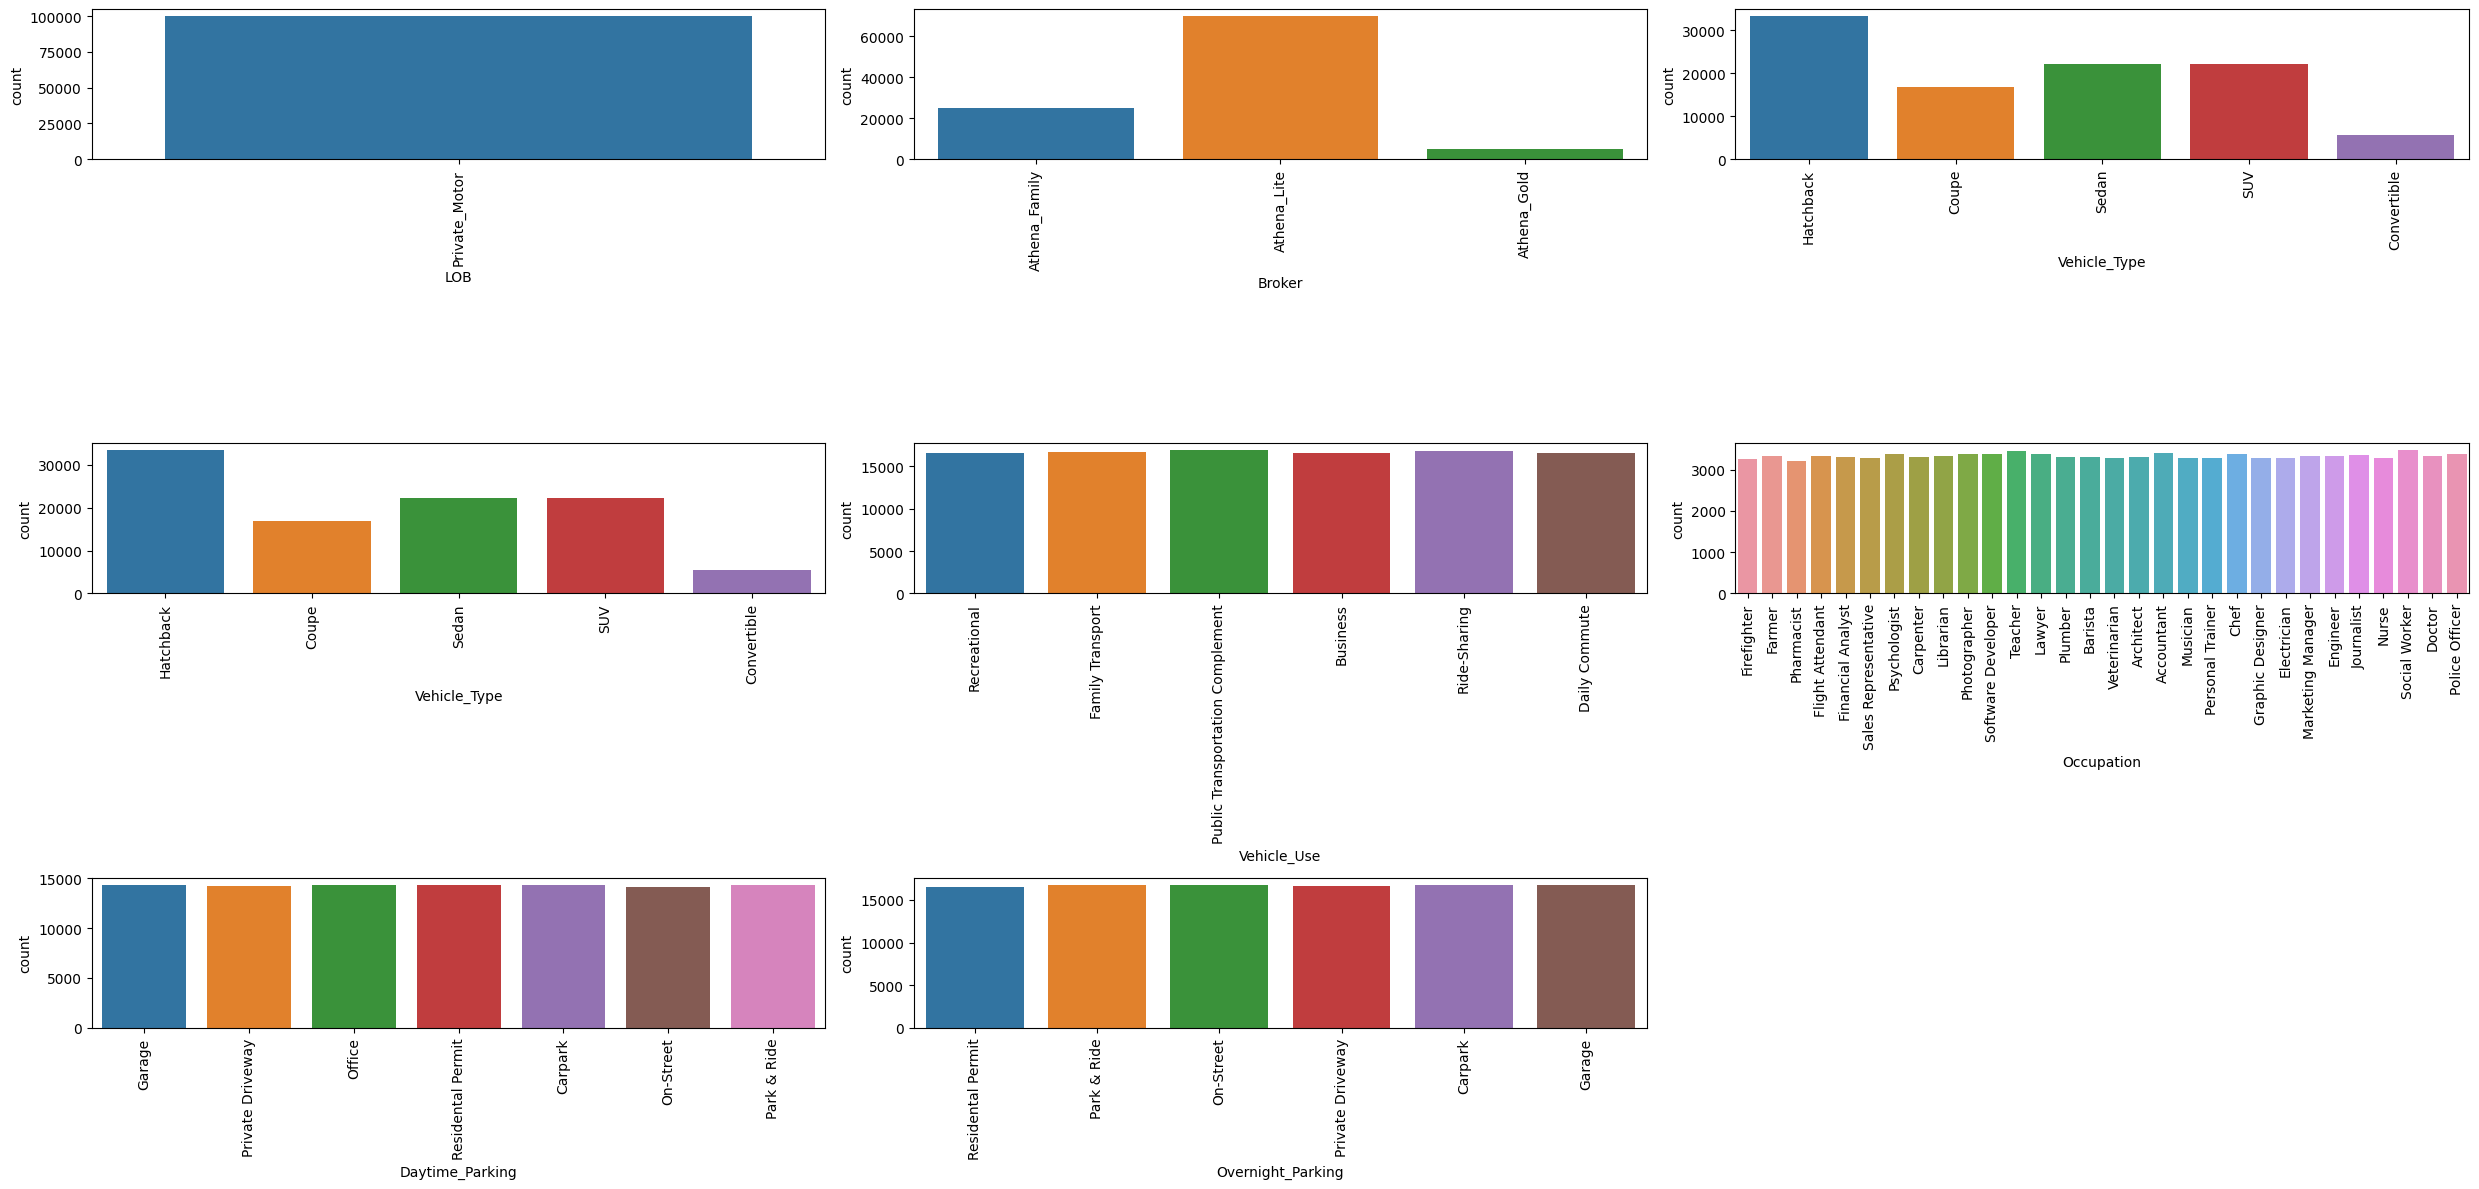

In [18]:
# List of categorical columns to be analyzed
cat_cols = ["LOB", "Broker", "Vehicle_Type", "Vehicle_Type", "Vehicle_Use", "Occupation", "Daytime_Parking", "Overnight_Parking"]

# Creating a grid of subplots (3 rows, 3 columns) for visualization
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25, 12))
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Looping through the categorical columns and their index
for i, var in enumerate(cat_cols):

    # Creating a count plot for the current categorical column
    sns.countplot(x=var, data=new_data, ax=axs[i])

    # Rotating x-axis labels for better readability
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjusting the layout of subplots for better presentation
fig.tight_layout()

# Removing the last subplot (which is empty) from the layout
fig.delaxes(axs[8])

# Displaying the complete figure with all subplots
plt.show()


###Pie -Chart

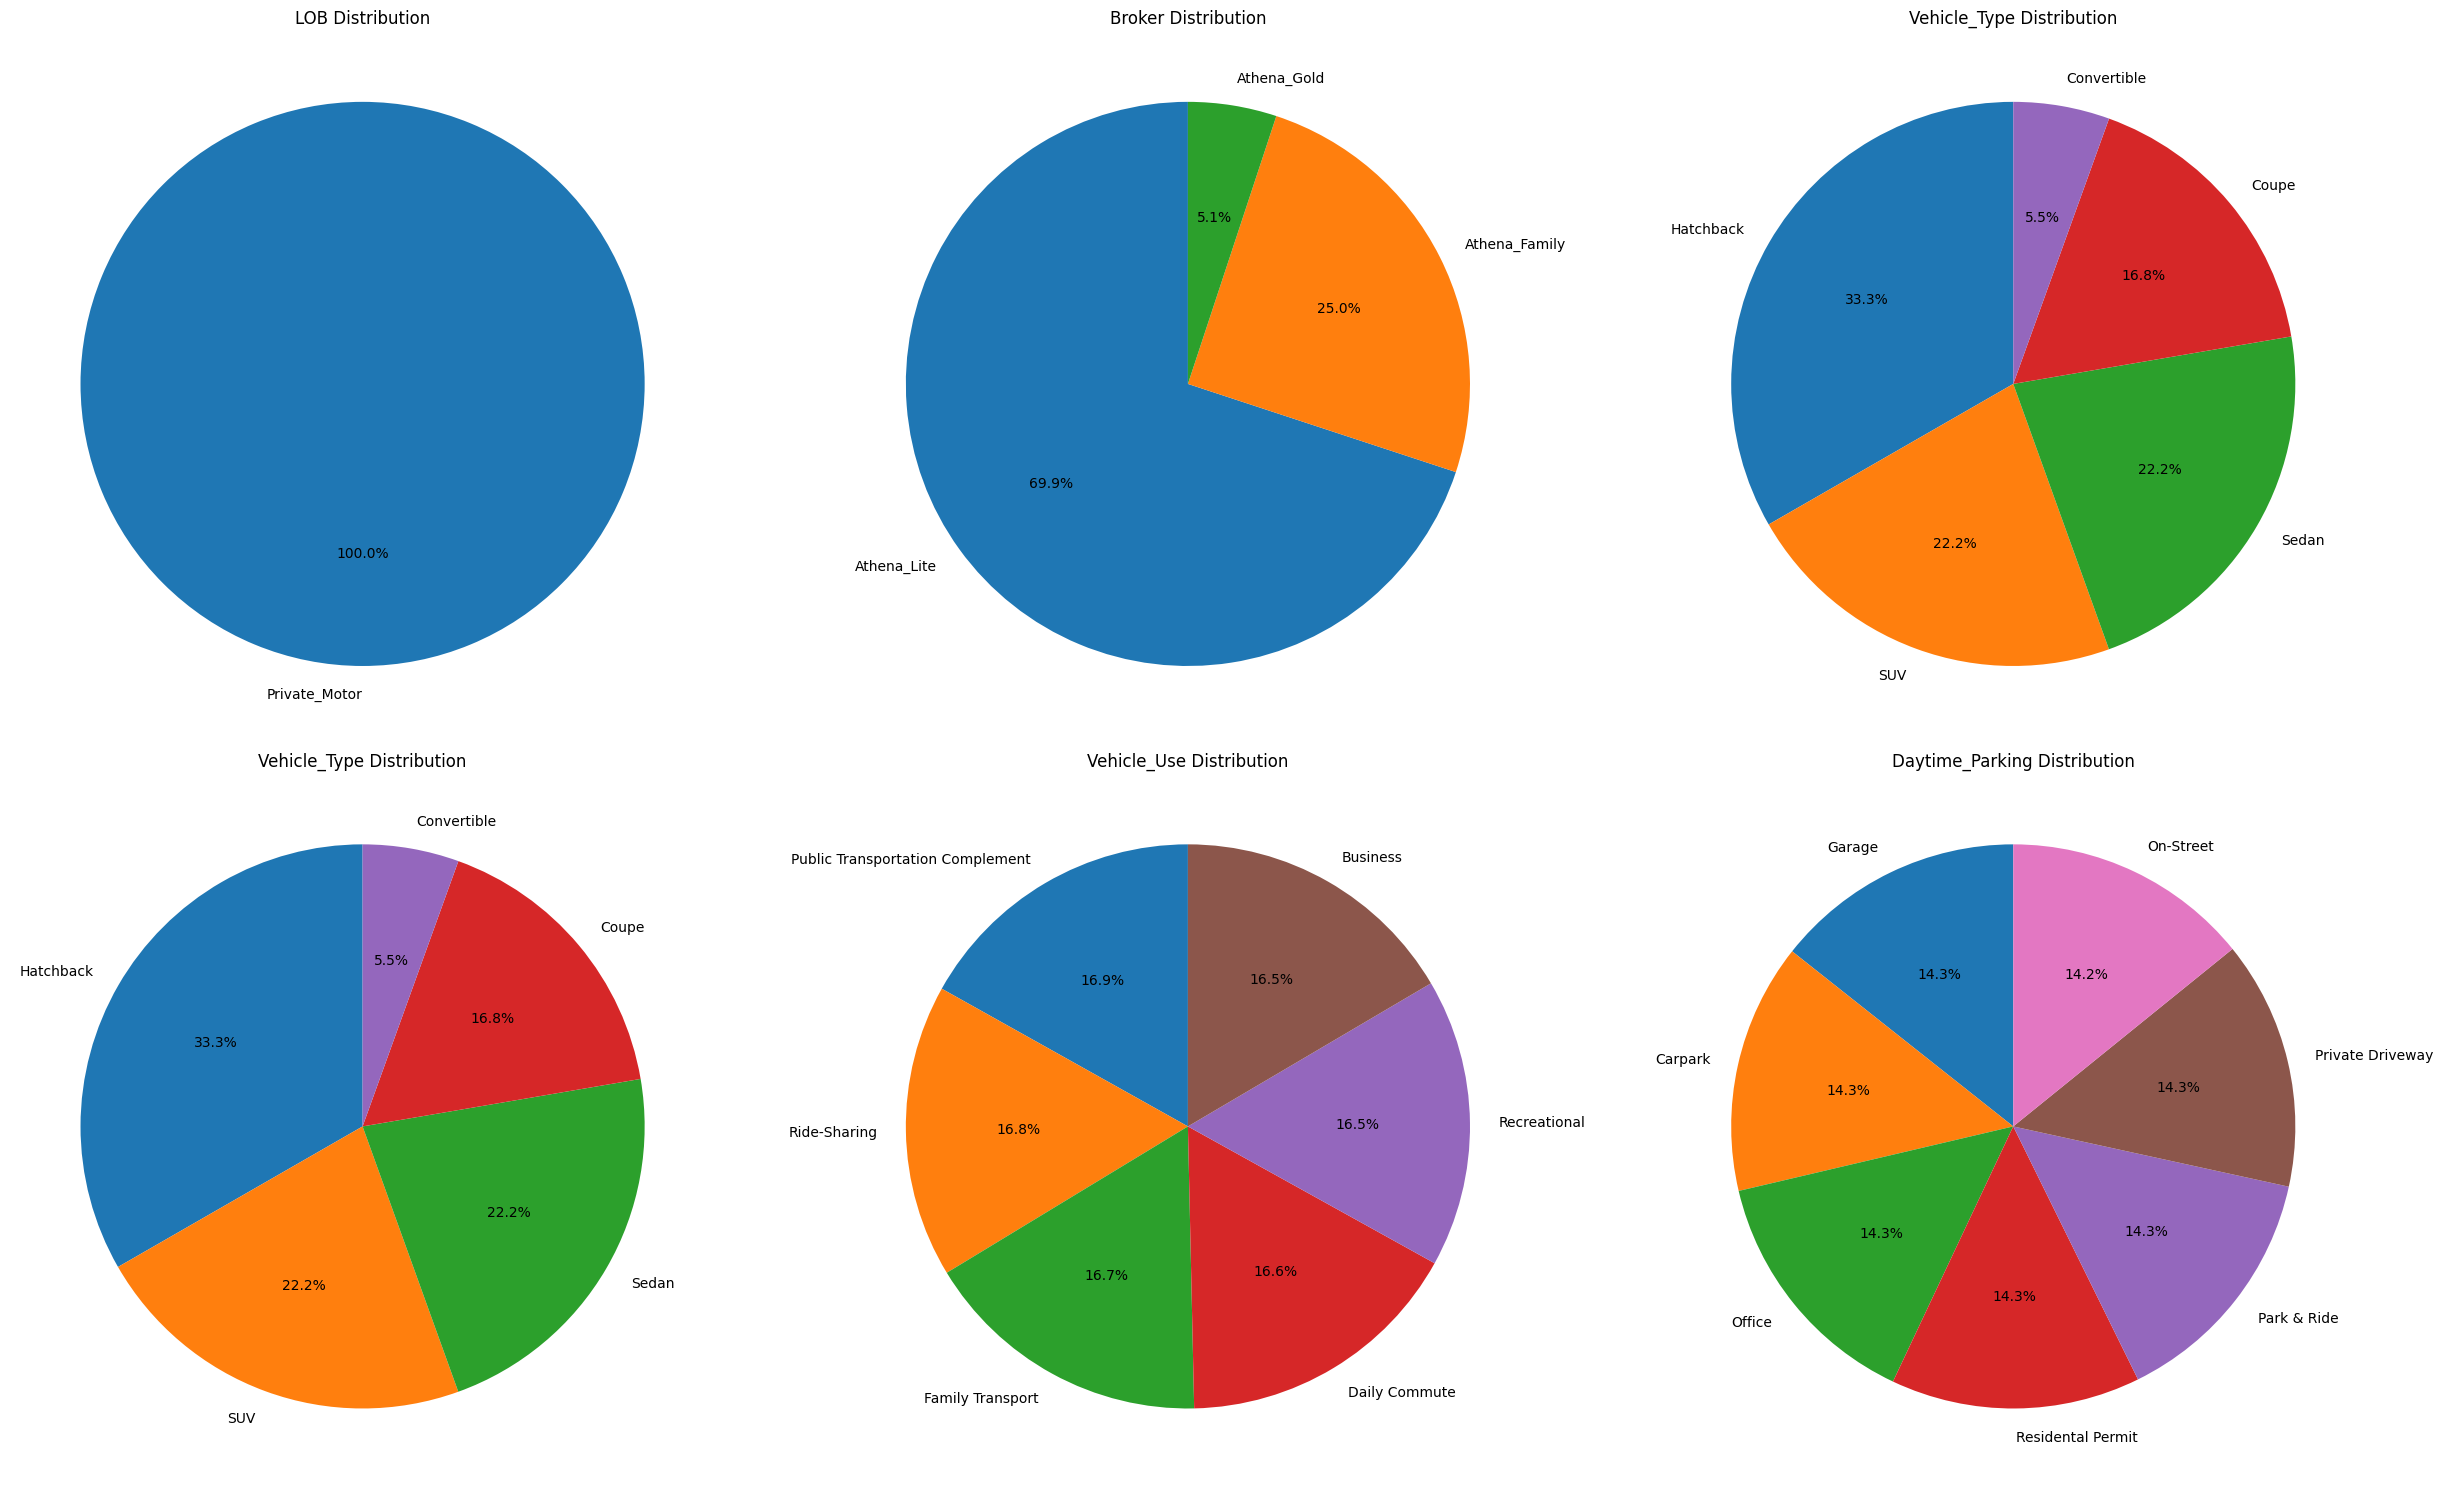

In [19]:
# List of categorical columns to be analyzed
cat_cols = ["LOB", "Broker", "Vehicle_Type", "Vehicle_Type", "Vehicle_Use", "Daytime_Parking", "Overnight_Parking"]

# Creating a grid of subplots (3 columns, 2 rows) for visualization
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(25, 15))

# Looping through the categorical columns and their index
for i, var in enumerate(cat_cols):

    # Checking if there are still available subplots to use
    if i < len(axs.flat):

        # Calculating the counts of each category in the current column
        cat_counts = new_data[var].value_counts()

        # Creating a pie chart on the current subplot
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Setting the title of the subplot based on the current categorical column
        axs.flat[i].set_title(f'{var} Distribution')

# Adjusting the layout of subplots for better presentation
fig.tight_layout()

# Displaying the complete figure with all subplots
plt.show()


###Numerical cols

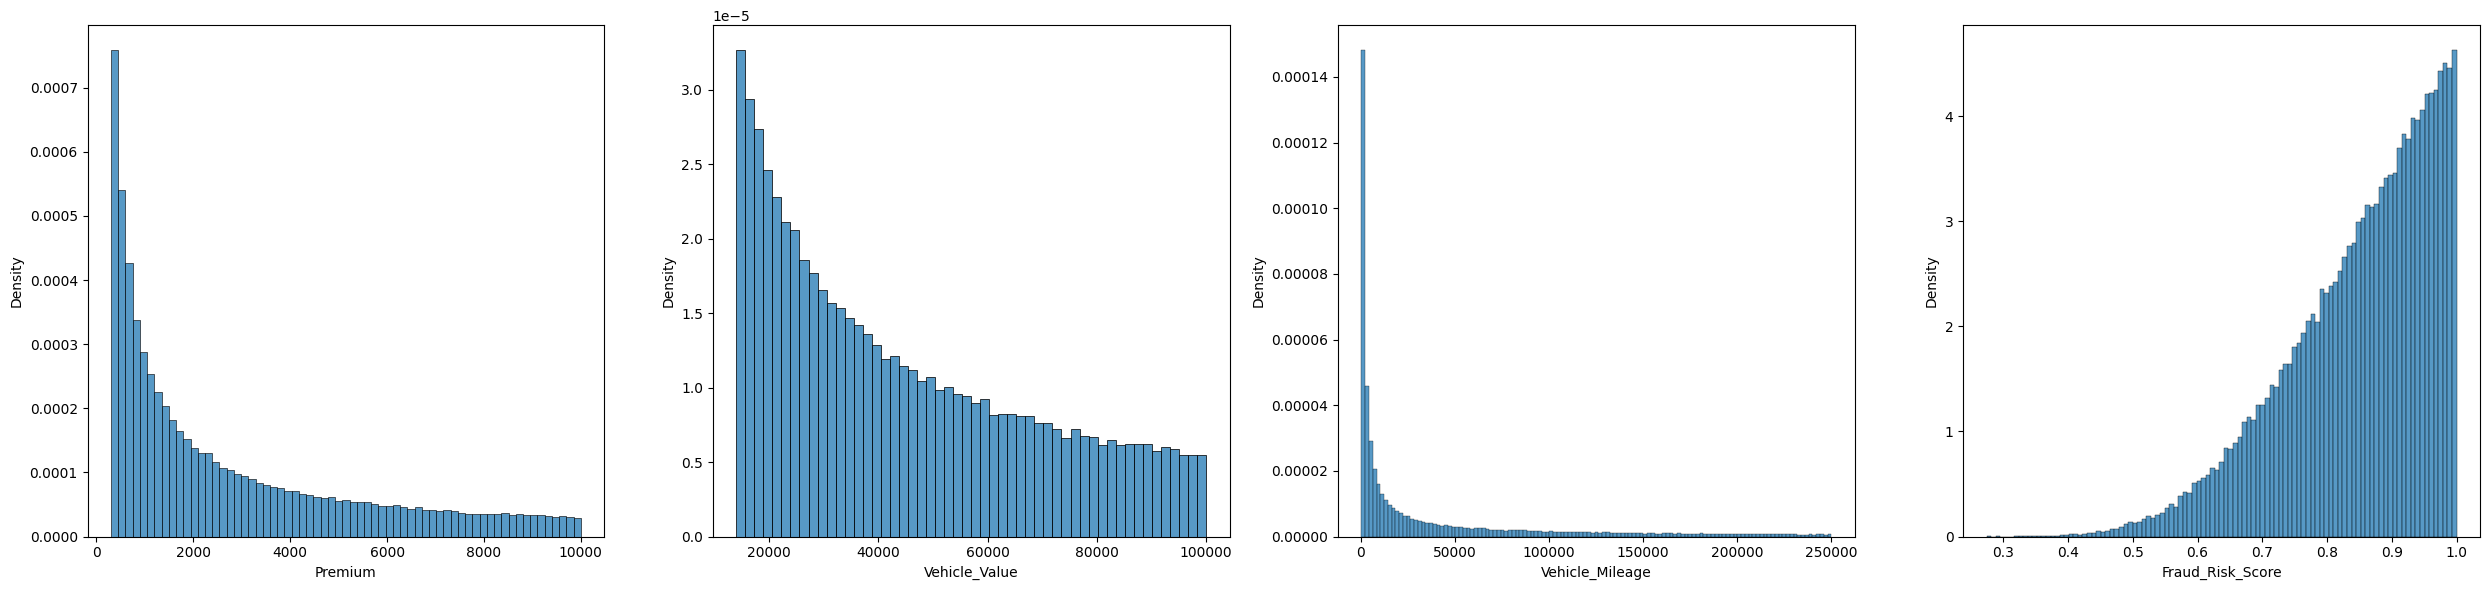

In [20]:
# List of numerical columns to be analyzed
num_cols = ["Premium", "Vehicle_Value", "Vehicle_Mileage", "Fraud_Risk_Score"]

# Creating a grid of subplots (1 row, 4 columns) for visualization
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Looping through the numerical columns and their index
for i, var in enumerate(num_cols):

    # Creating a histogram plot for the current numerical column
    sns.histplot(x=var, data=new_data, ax=axs[i], kde=False, element="bars", fill=True, stat='density')

    # Defining xticks based on the number of unique values in the column
    xticks = range(len(new_data[var].unique()))

# Adjusting the layout of subplots for better presentation
fig.tight_layout()

# Displaying the complete figure with all subplots
plt.show()


### checking all age columns

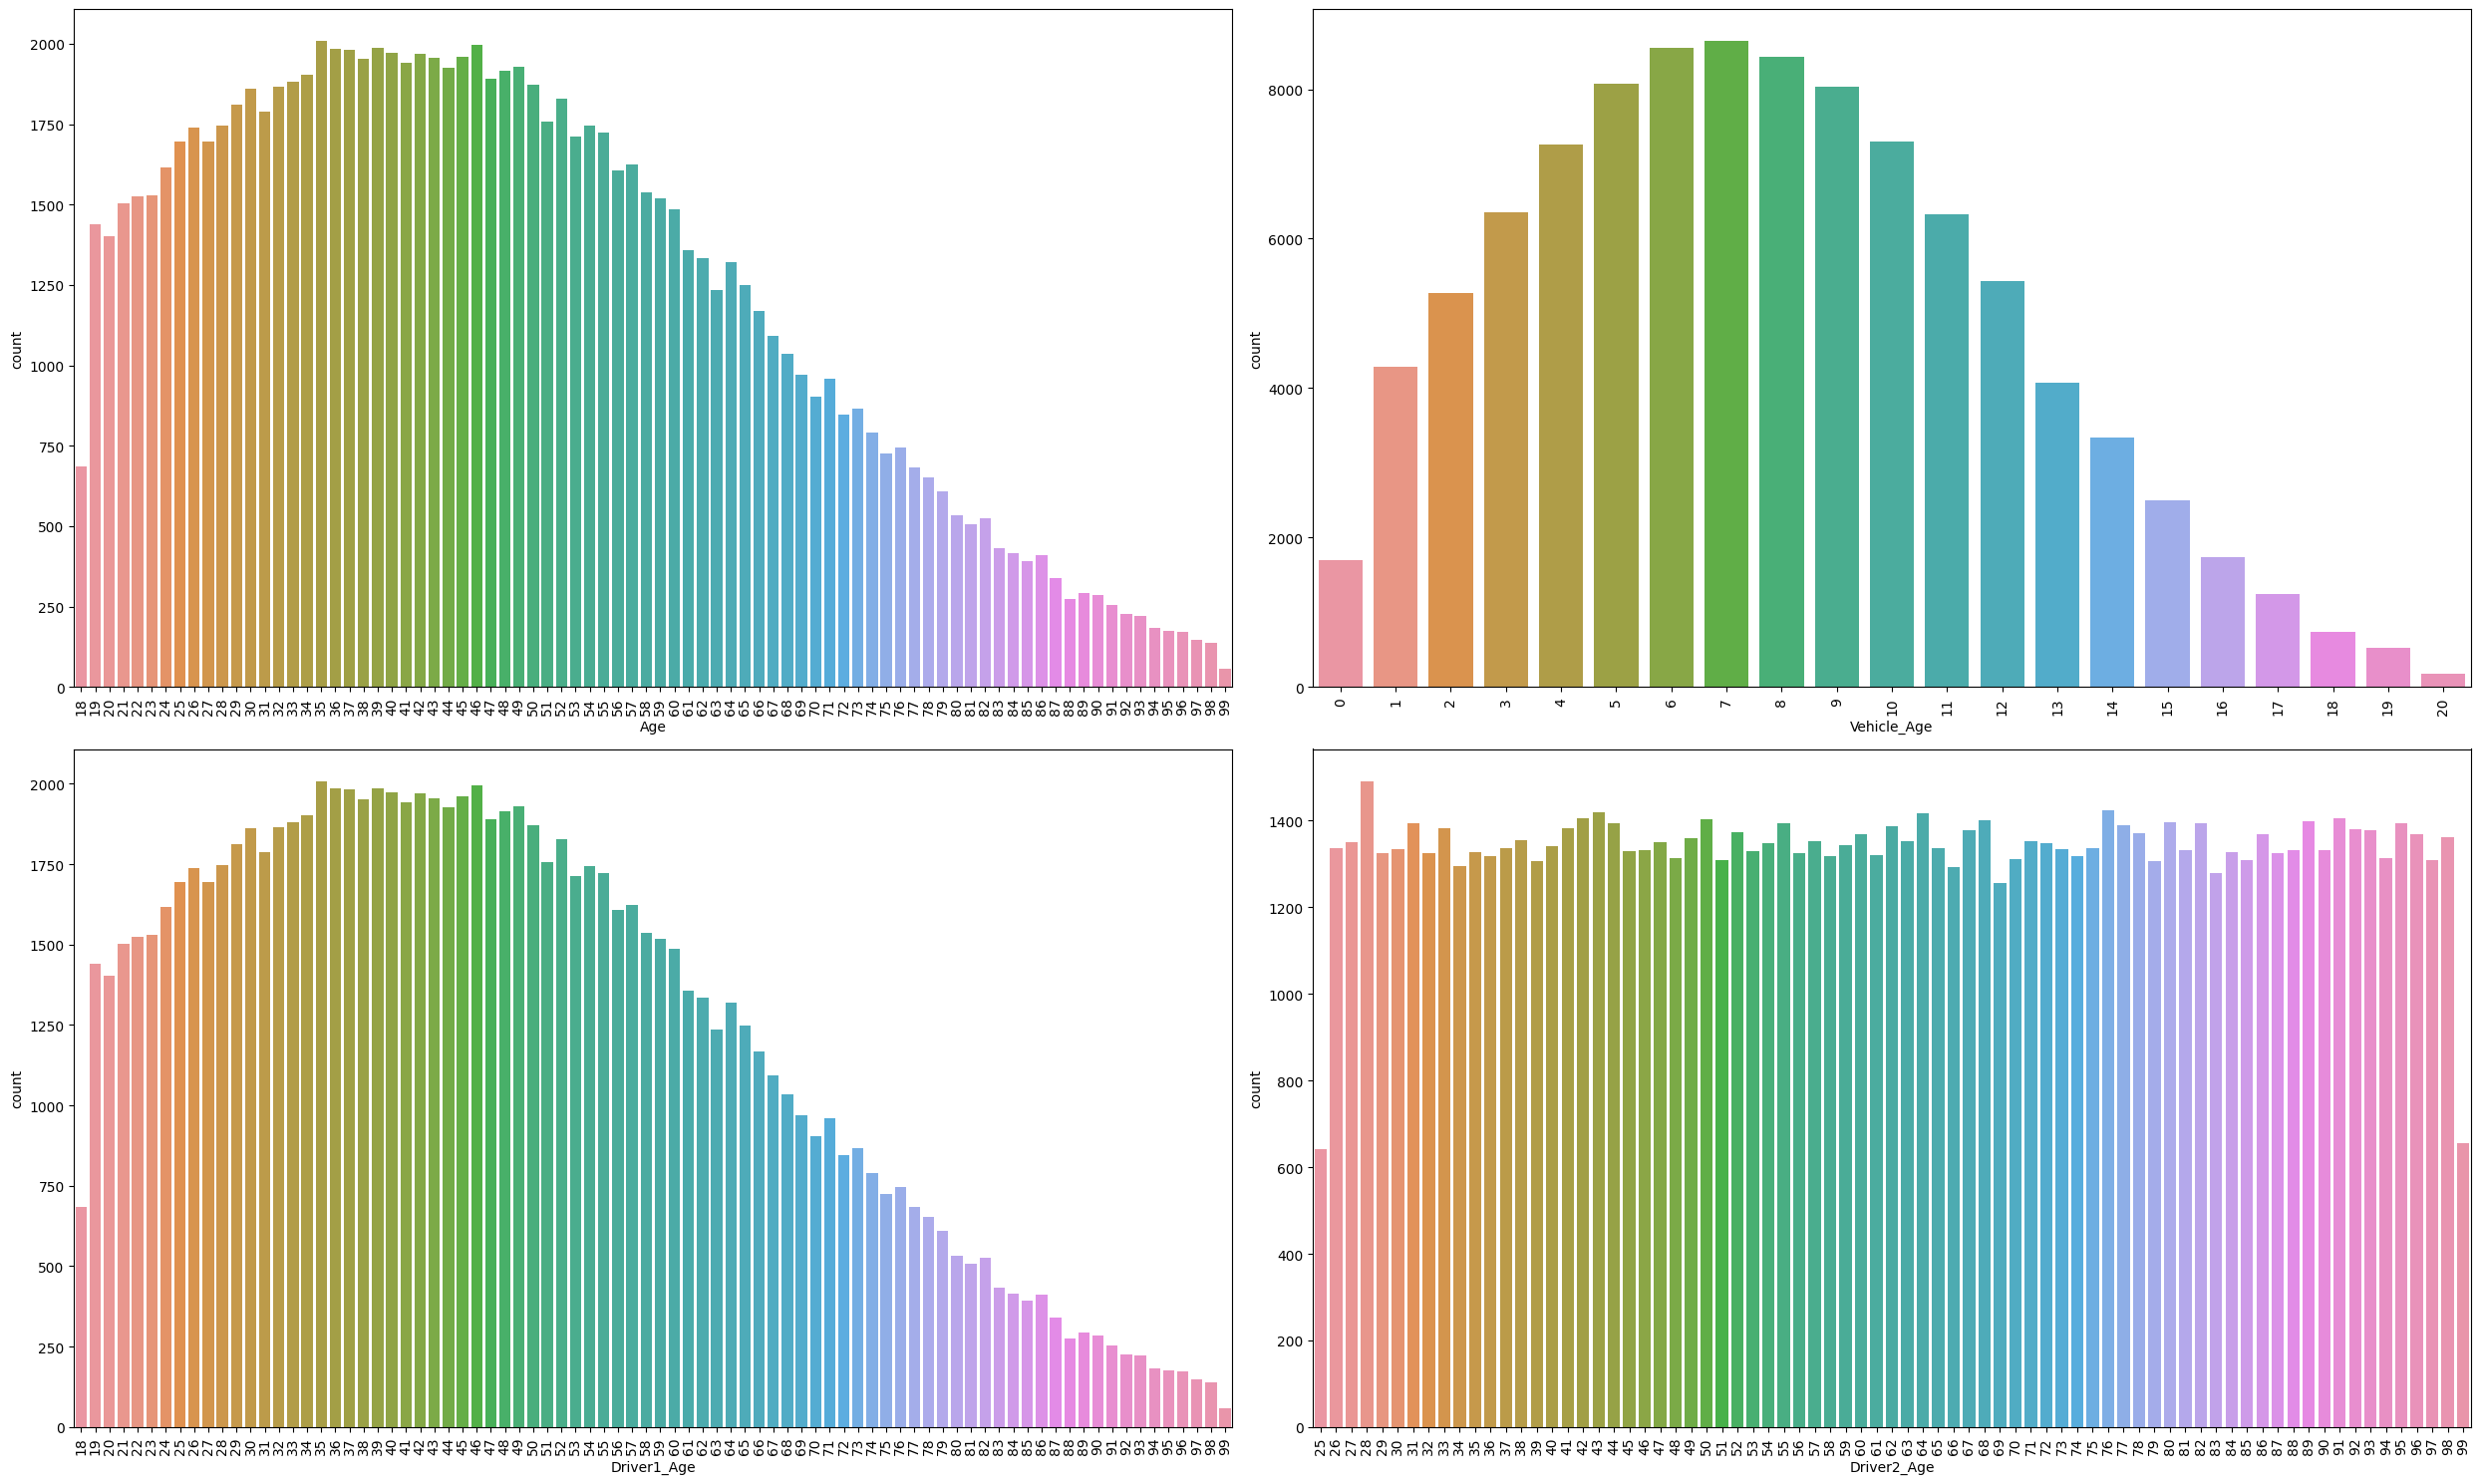

In [21]:
# List of age-related columns to be analyzed
age_cols = ["Age", "Vehicle_Age", "Driver1_Age", "Driver2_Age"]

# Creating a grid of subplots (2 rows, 2 columns) for visualization
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Looping through the age-related columns and their index
for i, var in enumerate(age_cols):

    # Creating a count plot for the current age-related column
    sns.countplot(x=var, data=new_data, ax=axs[i])

    # Rotating x-axis labels for better readability
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjusting the layout of subplots for better presentation
fig.tight_layout()

# Displaying the complete figure with all subplots
plt.show()



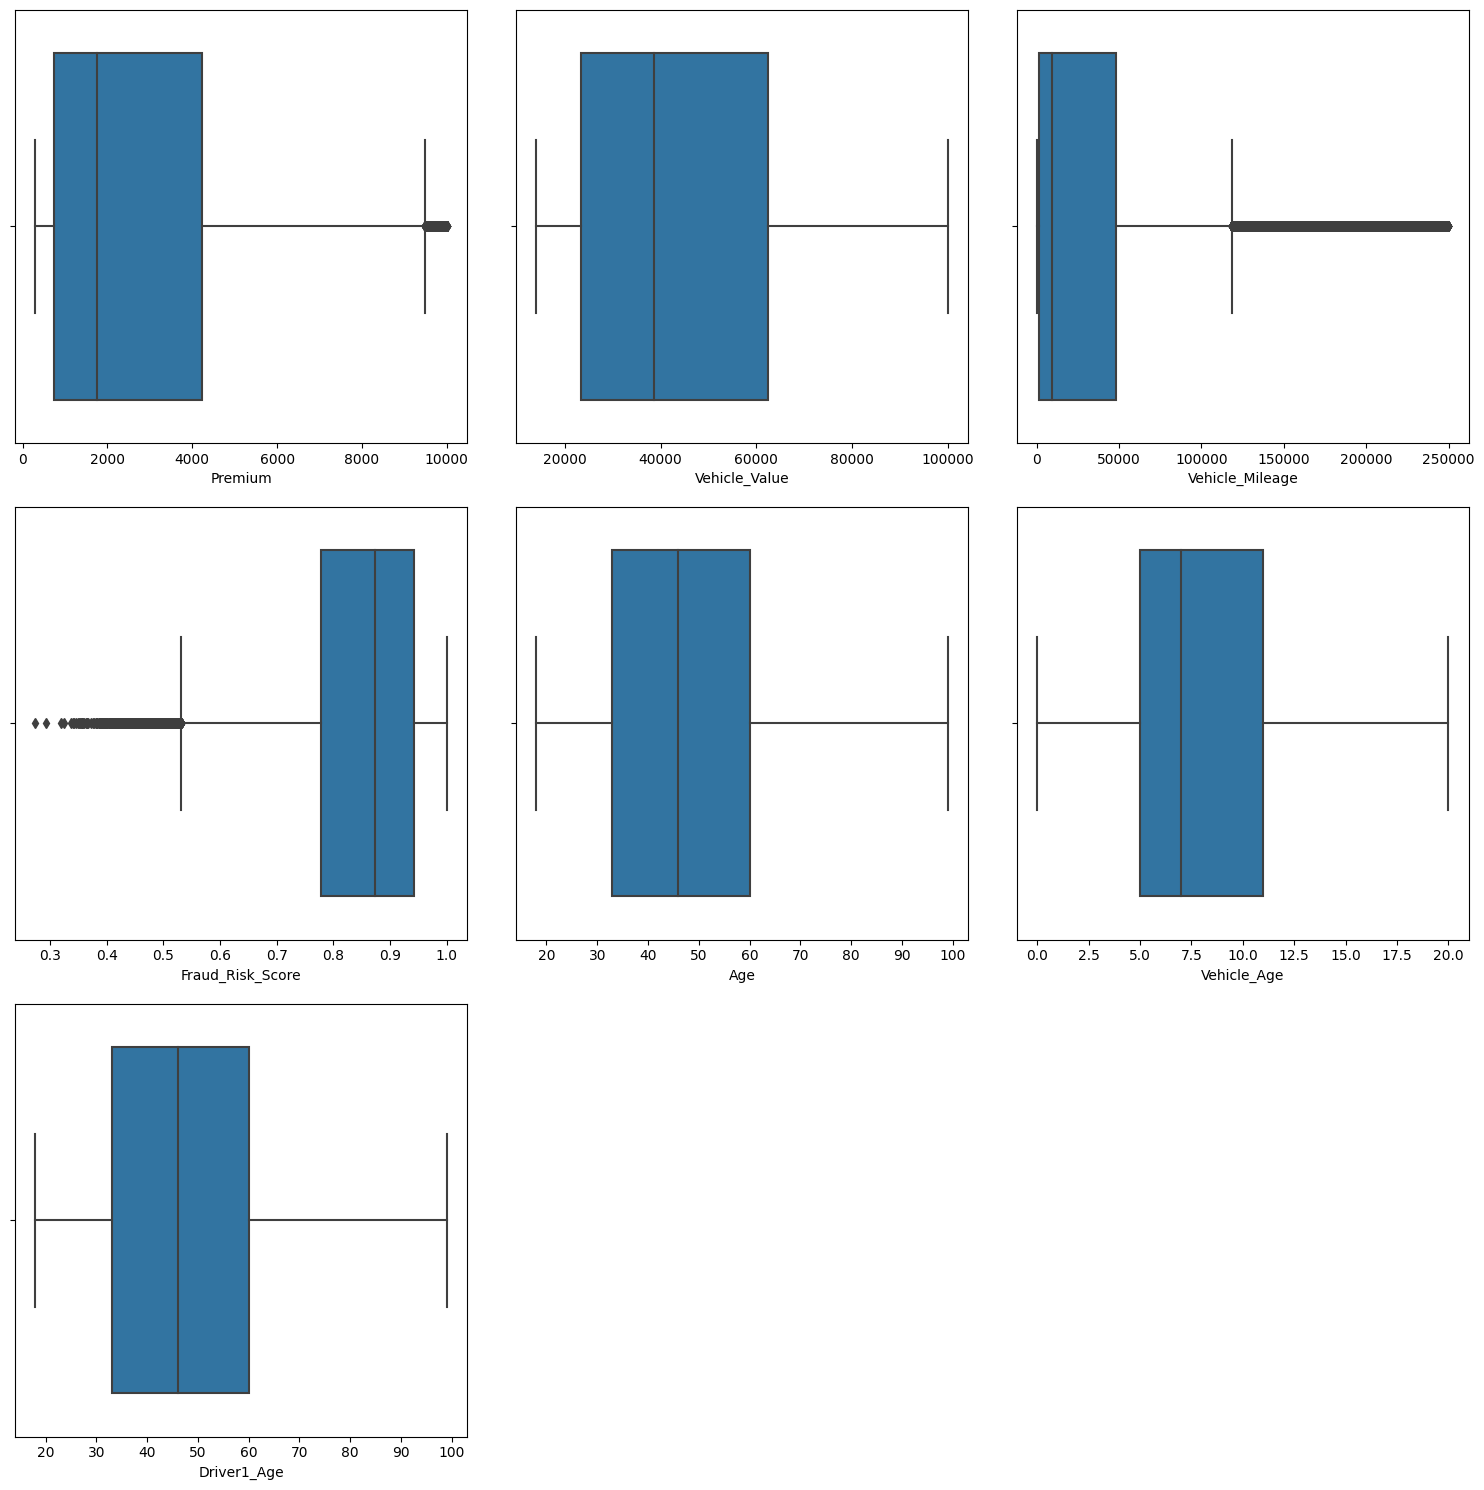

In [22]:
# List of numerical columns to be analyzed
num_cols = ["Premium", "Vehicle_Value", "Vehicle_Mileage", "Fraud_Risk_Score",
            "Age", "Vehicle_Age", "Driver1_Age", "Driver2_Age"]

# Creating a grid of subplots (3 rows, 3 columns) for visualization
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Looping through the numerical columns and their index
for i, var in enumerate(num_cols):

    # Creating a boxplot for the current numerical column
    sns.boxplot(x=var, data=new_data, ax=axs.flatten()[i])

# Adjusting the layout of subplots for better presentation
fig.tight_layout()

# Removing specific subplots from the layout (2nd and 3rd row, last two columns)
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])

# Displaying the complete figure with all subplots
plt.show()


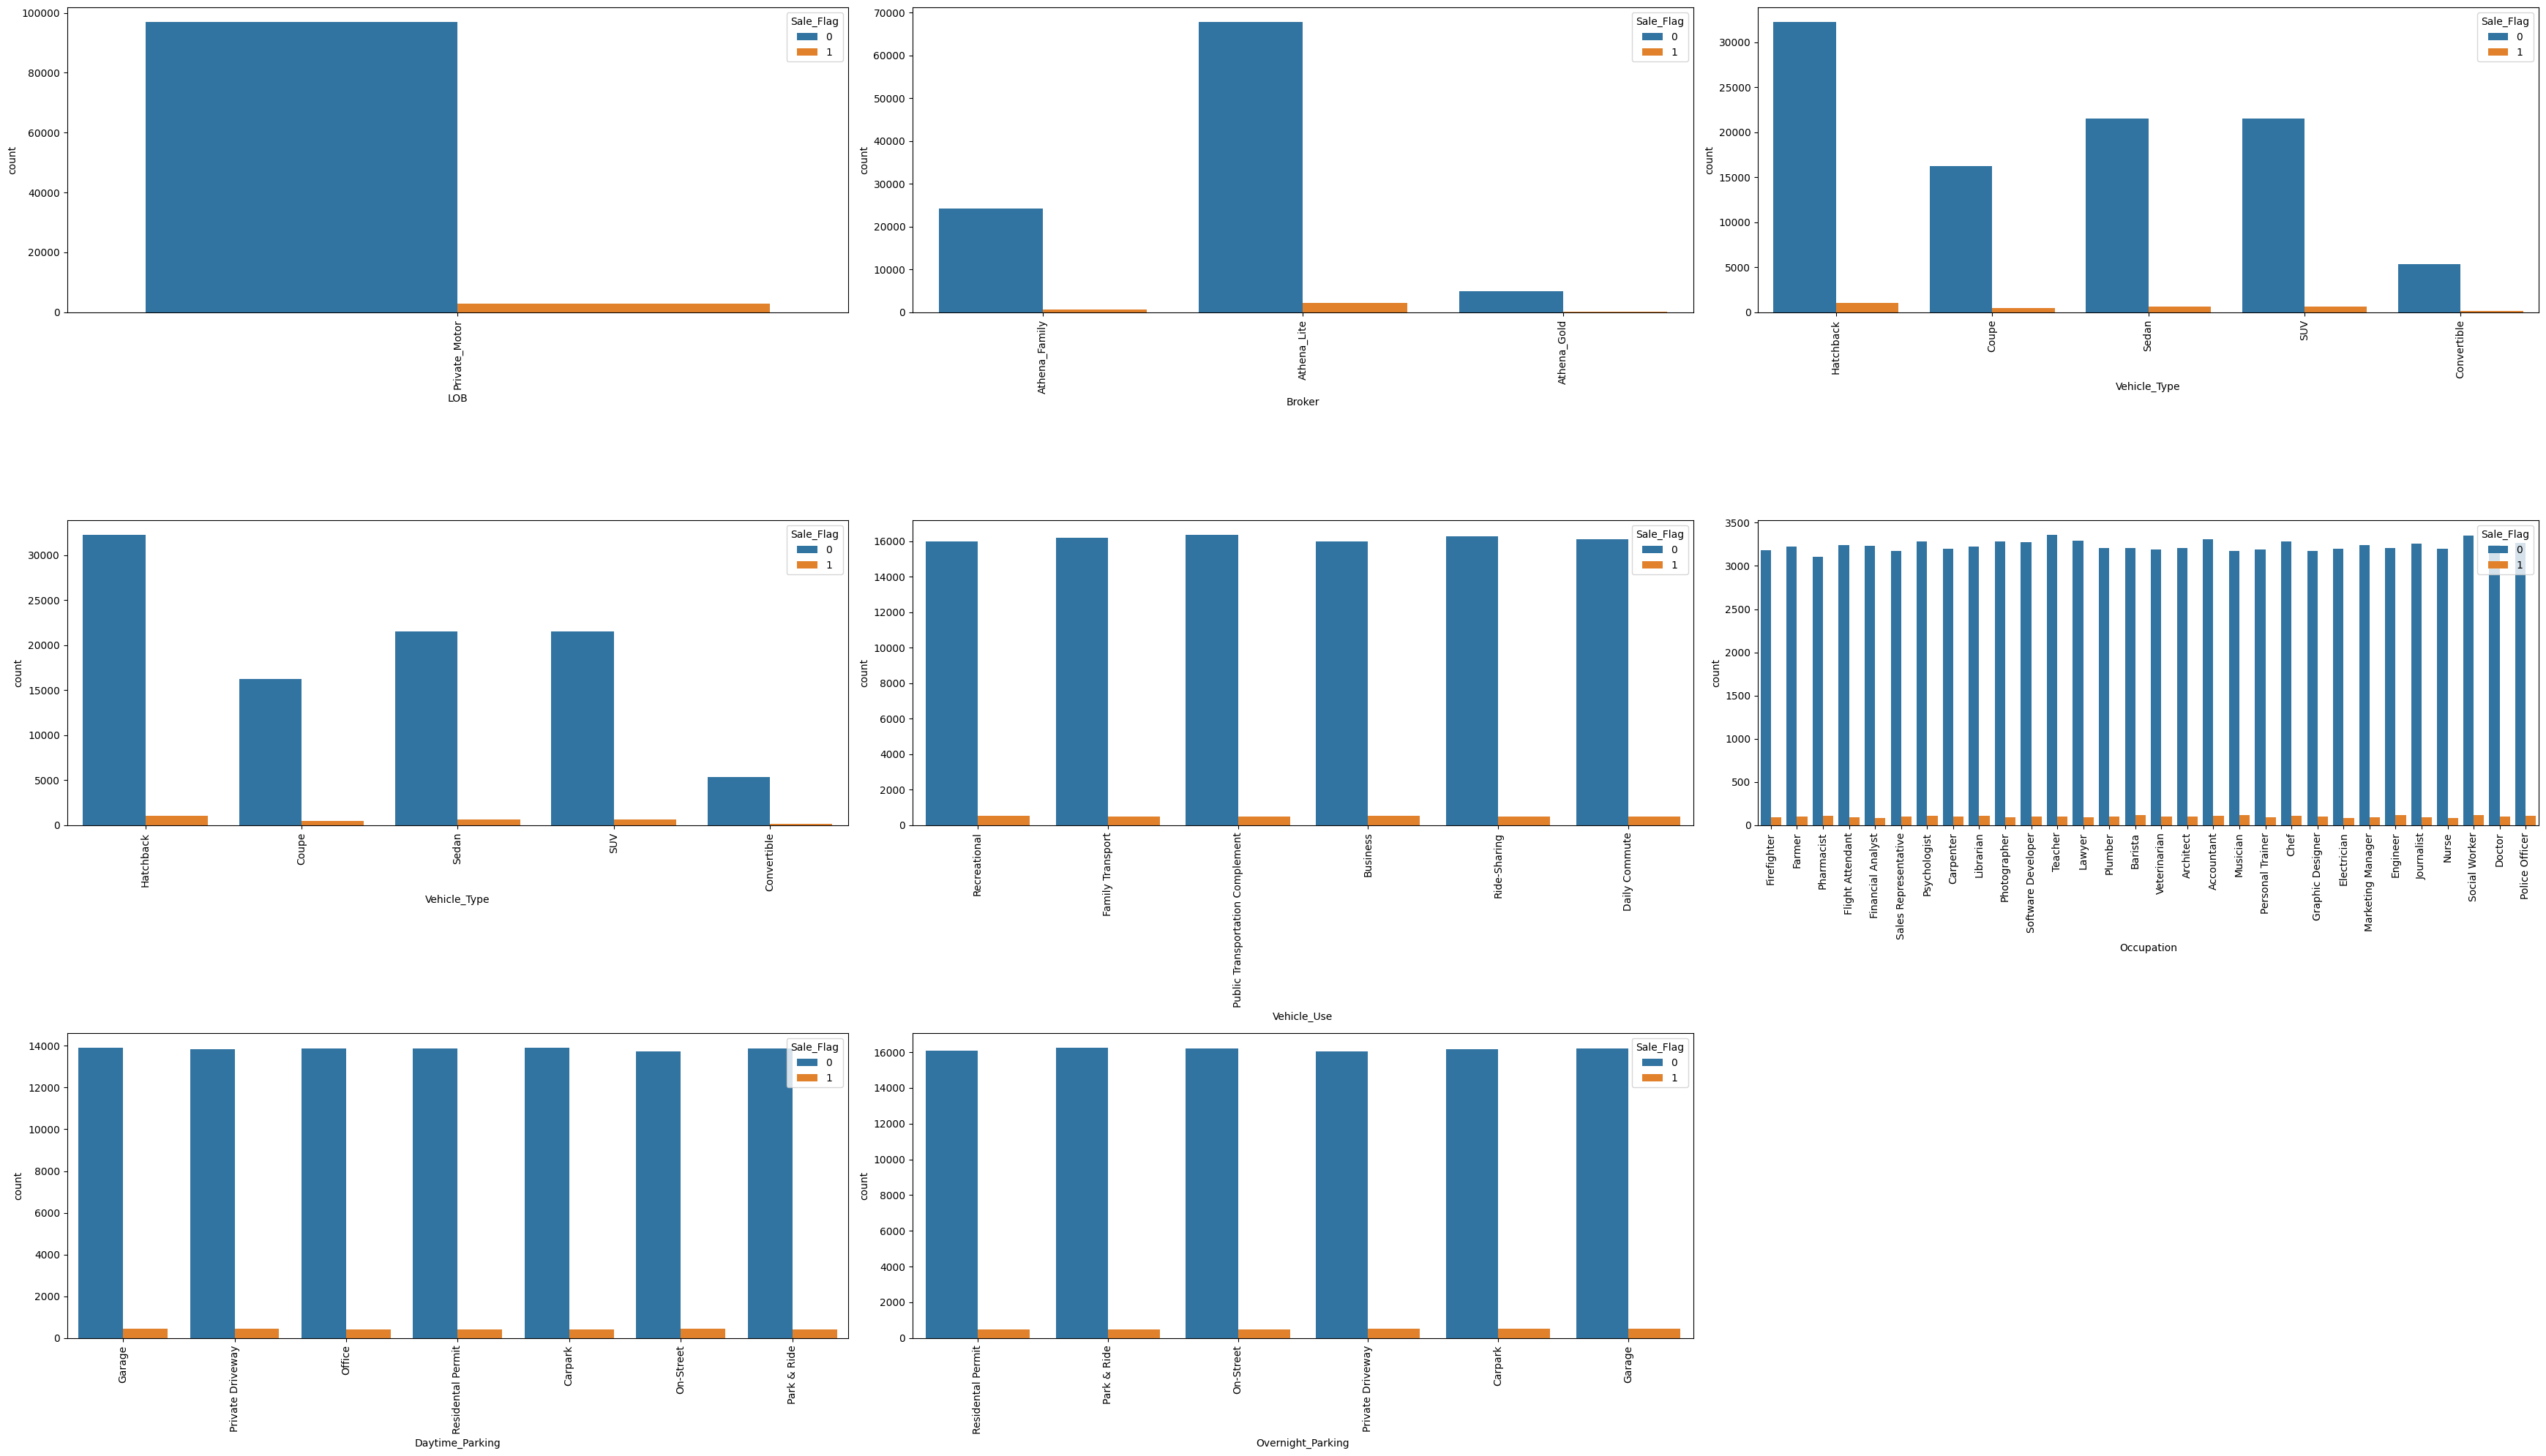

In [23]:
# List of categorical columns to be analyzed
cat_cols = ["LOB", "Broker", "Vehicle_Type", "Vehicle_Type", "Vehicle_Use", "Occupation", "Daytime_Parking", "Overnight_Parking"]

# Creating a grid of subplots (3 rows, 3 columns) for visualization
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(35, 20))
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Looping through the categorical columns and their index
for i, var in enumerate(cat_cols):

    # Creating a count plot with hue for 'Sale_Flag' in the current categorical column
    sns.countplot(x=var, hue='Sale_Flag', data=new_data, ax=axs[i])

    # Rotating x-axis labels for better readability
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjusting the layout of subplots for better presentation
fig.tight_layout()

# Removing the last subplot (which is empty) from the layout
fig.delaxes(axs[8])

# Displaying the complete figure with all subplots
plt.show()


In [24]:
# Calculating the correlation matrix for the dataset
correlation = new_data.corr()


<ipython-input-24-4916e7b4e927>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = new_data.corr()


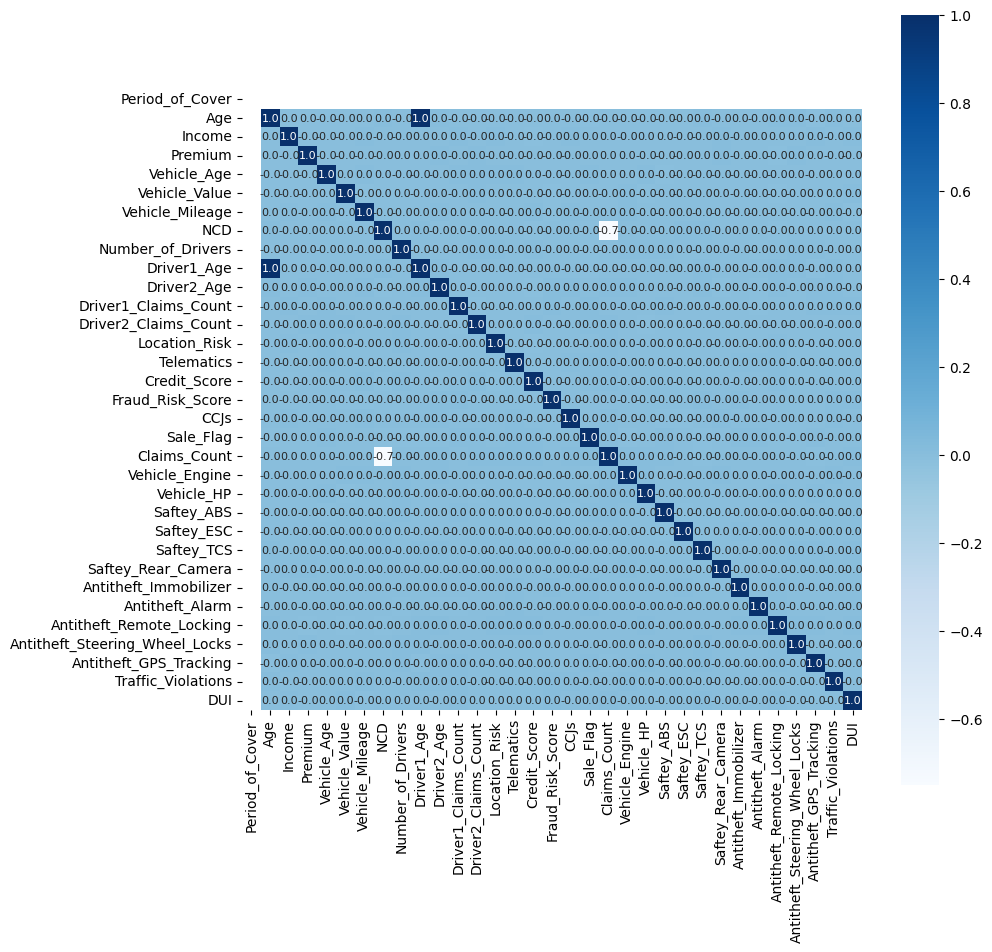

In [25]:
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))  # Set the figure size

# Creating a heatmap using Seaborn's heatmap function
# - 'correlation' is the correlation matrix you calculated earlier
# - cbar=True: Show a color bar
# - square=True: Make the cells in the heatmap square
# - fmt='.1f': Format the values in the heatmap to have one decimal place
# - annot=True: Display the correlation values in each cell
# - annot_kws={'size': 8}: Set the font size of the annotation text
# - cmap='Blues': Use the 'Blues' color map for the heatmap
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

# Display the heatmap
plt.show()


#Feature engineering

###First set the date columns

In [26]:
# Converting the 'Cover_Start_Date' column to datetime format
new_data['Cover_Start_Date'] = pd.to_datetime(new_data['Cover_Start_Date'])

# Converting the 'Cover_End_Date' column to datetime format
new_data['Cover_End_Date'] = pd.to_datetime(new_data['Cover_End_Date'])

# Converting the 'Purchase_Date' column to datetime format
new_data['Purchase_Date'] = pd.to_datetime(new_data['Purchase_Date'])


In [27]:
#Cover_Start_Date
new_data['cover_start_year'] = new_data['Cover_Start_Date'].dt.year
new_data['cover_start_month'] = new_data['Cover_Start_Date'].dt.month
new_data['cover_start_day'] = new_data['Cover_Start_Date'].dt.day

#Cover_End_Date
new_data['cover_end_year'] = new_data['Cover_End_Date'].dt.year
new_data['cover_end_month'] = new_data['Cover_End_Date'].dt.month
new_data['cover_end_day'] = new_data['Cover_End_Date'].dt.day

#Purchase_Date
new_data['purchase_year'] = new_data['Purchase_Date'].dt.year
new_data['purchase_month'] = new_data['Purchase_Date'].dt.month
new_data['purchase_day'] = new_data['Purchase_Date'].dt.day

In [28]:
new_data.columns

Index(['Customer_ID', 'Purchase_Date', 'Cover_Start_Date', 'Cover_End_Date',
       'Period_of_Cover', 'LOB', 'Broker', 'Age', 'Occupation', 'Income',
       'Marital_Status', 'Premium', 'Vehicle_Type', 'Vehicle_Brand',
       'Vehicle_Age', 'Vehicle_Value', 'Vehicle_Use', 'Vehicle_Mileage', 'NCD',
       'Number_of_Drivers', 'Driver1_Age', 'Driver2_Age',
       'Driver1_Claims_Count', 'Driver2_Claims_Count', 'Location_Risk',
       'Daytime_Parking', 'Overnight_Parking', 'Telematics', 'Credit_Score',
       'Fraud_Risk_Score', 'CCJs', 'Sale_Flag', 'Claims_Count',
       'Vehicle_Engine', 'Vehicle_HP', 'Saftey_ABS', 'Saftey_ESC',
       'Saftey_TCS', 'Saftey_Rear_Camera', 'Antitheft_Immobilizer',
       'Antitheft_Alarm', 'Antitheft_Remote_Locking',
       'Antitheft_Steering_Wheel_Locks', 'Antitheft_GPS_Tracking', 'Fuel_Type',
       'Transmission', 'Coverage_Type', 'Area_Type', 'Insurance_Type',
       'Payment_Type', 'Traffic_Violations', 'DUI', 'Education', 'Licence',
       'Chann

In [29]:
new_data.shape

(100000, 64)

In [30]:
# Creating a new DataFrame 'new_data_1' by dropping specified columns from 'new_data'
# The columns to be dropped are: 'Purchase_Date', 'Cover_Start_Date', and 'Cover_End_Date'
new_data_1 = new_data.drop(columns=['Purchase_Date', 'Cover_Start_Date', 'Cover_End_Date'], axis=1)


In [31]:
new_data_1.shape

(100000, 61)

###now removing the detected outliers of premium, fraud risk score, vehicle mileage

<ipython-input-32-480953bb7284>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data_1['Premium'])
<ipython-input-32-480953bb7284>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data_1['Fraud_Risk_Score'])
<ipython-input-32-480953bb7284>:17: UserWarning: 

`distplot` is a deprecated 

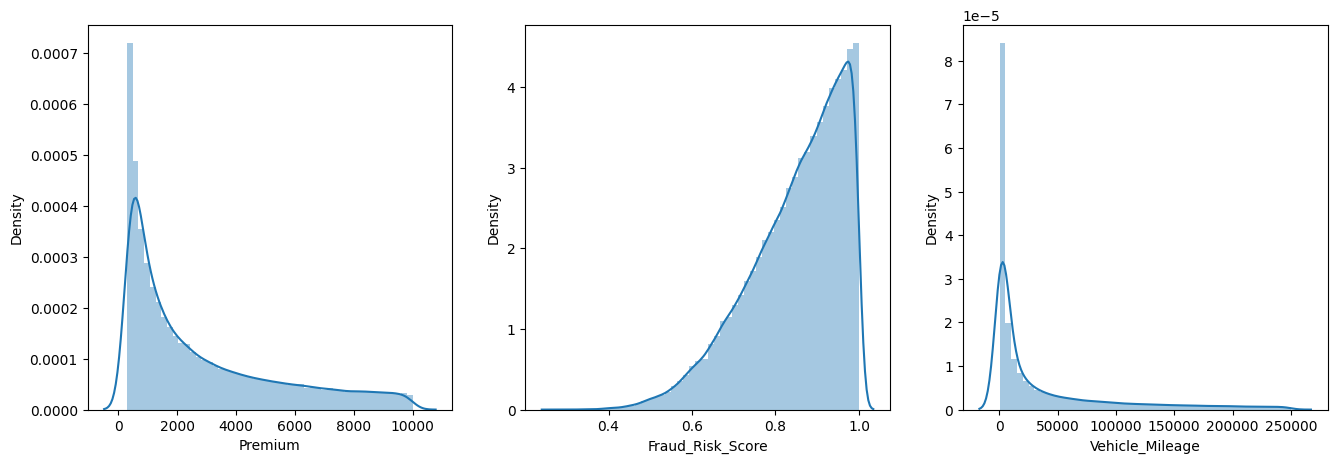

In [32]:
# Creating a figure with a size of 16x5 inches
plt.figure(figsize=(16, 5))

# Creating the first subplot (1 row, 3 columns), selecting the first subplot
plt.subplot(1, 3, 1)
# Creating a distribution plot (histogram with kernel density estimation) for 'Premium' column
sns.distplot(new_data_1['Premium'])

# Creating the second subplot (1 row, 3 columns), selecting the second subplot
plt.subplot(1, 3, 2)
# Creating a distribution plot for 'Fraud_Risk_Score' column
sns.distplot(new_data_1['Fraud_Risk_Score'])

# Creating the third subplot (1 row, 3 columns), selecting the third subplot
plt.subplot(1, 3, 3)
# Creating a distribution plot for 'Vehicle_Mileage' column
sns.distplot(new_data_1['Vehicle_Mileage'])

# Displaying the complete figure with all subplots
plt.show()


###All the columns are skewed so we using iqr technique specifically capping

In [33]:

# List of columns to cap
columns_to_cap = ['Premium', 'Fraud_Risk_Score', 'Vehicle_Mileage']

# Multiplier to determine the threshold for outliers
k = 1.5

# Loop through each column to perform capping
for col in columns_to_cap:

    # Calculate the first quartile (Q1) and third quartile (Q3) of the column
    Q1 = new_data_1[col].quantile(0.25)
    Q3 = new_data_1[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the upper and lower bounds for capping
    upper_bound = Q3 + k * IQR
    lower_bound = Q1 - k * IQR

    # Apply capping: replace values above the upper bound with the upper bound
    new_data_1[col] = new_data_1[col].apply(lambda x: upper_bound if x > upper_bound else x)

    # Apply capping: replace values below the lower bound with the lower bound
    new_data_1[col] = new_data_1[col].apply(lambda x: lower_bound if x < lower_bound else x)


#Now labelEncoding our object datatypes


In [34]:
# Iterate through categorical columns (columns with dtype 'object')
for col in new_data_1.select_dtypes(include=['object']).columns:

    # Print the column name followed by its unique values
    print(f"{col}: {new_data_1[col].unique()}")


Customer_ID: ['15c58f38e984a0a6ec04079a64744f57' '0dbb8bd243274418e88fb254ba0f9f56'
 '2be4737e76135ba890cc9e8ec02936cc' ... 'fc113c9fa6b920fbe1a867da6a589c63'
 '55ad7b64170bec7c2e90d06407858f39' '1c4f6c61b28efbf52f10c5675aea34df']
LOB: ['Private_Motor']
Broker: ['Athena_Family' 'Athena_Lite' 'Athena_Gold']
Occupation: ['Firefighter' 'Farmer' 'Pharmacist' 'Flight Attendant'
 'Financial Analyst' 'Sales Representative' 'Psychologist' 'Carpenter'
 'Librarian' 'Photographer' 'Software Developer' 'Teacher' 'Lawyer'
 'Plumber' 'Barista' 'Veterinarian' 'Architect' 'Accountant' 'Musician'
 'Personal Trainer' 'Chef' 'Graphic Designer' 'Electrician'
 'Marketing Manager' 'Engineer' 'Journalist' 'Nurse' 'Social Worker'
 'Doctor' 'Police Officer']
Marital_Status: ['Civil Partnership' 'Divorced' 'Married' 'Separated' 'Widowed' 'Single']
Vehicle_Type: ['Hatchback' 'Coupe' 'Sedan' 'SUV' 'Convertible']
Vehicle_Brand: ['Hyundai' 'Honda' 'Volvo' 'BMW' 'Tesla' 'Subaru' 'Mercedes' 'Toyota'
 'Ford' 'Vauxhall

In [35]:
# Importing LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Iterating through categorical columns (columns with dtype 'object')
for col in new_data_1.select_dtypes(include='object').columns:

    # Create a LabelEncoder instance
    le = LabelEncoder()

    # Fit the LabelEncoder on the unique values of the column
    le.fit(new_data_1[col].unique())

    # Transform the column values using the LabelEncoder
    new_data_1[col] = le.transform(new_data_1[col])

    # Print the column name followed by its transformed unique values
    print(f'{col} : {new_data_1[col].unique()}')


Customer_ID : [ 8512  5347 17102 ... 98456 33498 10982]
LOB : [0]
Broker : [0 2 1]
Occupation : [10  8 20 11  9 25 24  3 15 21 27 28 14 22  2 29  1  0 17 19  4 12  6 16
  7 13 18 26  5 23]
Marital_Status : [0 1 2 3 5 4]
Vehicle_Type : [2 1 4 3 0]
Vehicle_Brand : [ 3  2 11  0  8  7  5  9  1 10  6  4]
Vehicle_Use : [4 2 3 0 5 1]
Daytime_Parking : [1 5 2 6 0 3 4]
Overnight_Parking : [5 3 2 4 0 1]
Fuel_Type : [1 2 0]
Transmission : [0 1 2]
Coverage_Type : [2 3 1 0]
Area_Type : [2 1 0]
Insurance_Type : [1 0 2]
Payment_Type : [1 0]
Education : [1 2 4 3 0]
Licence : [0 2 1]
Channel : [0 1 6 4 5 3 2]


#Train Test Split

In [36]:
# Creating the feature matrix 'X' by dropping the 'Sale_Flag' column
X = new_data_1.drop(columns="Sale_Flag", axis=1)

# Creating the target vector 'Y' by selecting the 'Sale_Flag' column
Y = new_data_1['Sale_Flag']


In [37]:
# Importing train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# - X: Feature matrix
# - Y: Target vector
# - test_size: Percentage of data to allocate for testing (here, 20%)
# - random_state: Seed for random number generation to ensure reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [38]:
# Importing Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Importing Support Vector Classifier (SVC)
from sklearn.svm import SVC

# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier


In [40]:
%%time
# Importing DecisionTreeClassifier and GridSearchCV from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Creating a Decision Tree classifier with balanced class weights
dtree = DecisionTreeClassifier(class_weight='balanced')

# Defining a dictionary of hyperparameters to search over
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Creating a GridSearchCV instance with DecisionTreeClassifier, hyperparameters, and 5-fold cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5)


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
CPU times: user 14min 54s, sys: 16 s, total: 15min 10s
Wall time: 16min 18s


In [ ]:
%%time
# Fitting the grid search to the training data
grid_search.fit(X_train, Y_train)

# Printing the best hyperparameters found by the grid search
print(grid_search.best_params_)

In [41]:
%%time
# Importing DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree classifier with specified hyperparameters
dtree = DecisionTreeClassifier(
    random_state=42,
    max_depth=7,
    min_samples_leaf=1,
    min_samples_split=3,
    class_weight='balanced'
)

# Fitting the Decision Tree classifier to the training data
dtree.fit(X_train, Y_train)


CPU times: user 2.31 s, sys: 13.6 ms, total: 2.32 s
Wall time: 2.58 s


DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=3, random_state=42)

In [42]:
# Importing accuracy_score from scikit-learn
from sklearn.metrics import accuracy_score

# Making predictions using the trained Decision Tree classifier
y_pred = dtree.predict(X_test)

# Calculating and printing the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", round(accuracy * 100, 2), "%")


Accuracy Score: 56.67 %


In [43]:
# Importing the necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

# Calculating and printing the F1 Score
f1 = f1_score(Y_test, y_pred, average='micro')
print('F-1 Score:', f1)
# F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall,
# making it suitable for imbalanced datasets. A higher F1 Score indicates better performance.

# Calculating and printing the Precision Score
precision = precision_score(Y_test, y_pred, average='micro')
print('Precision Score:', precision)
# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
# It is useful when false positives are more critical. High precision indicates a low false positive rate.

# Calculating and printing the Recall Score
recall = recall_score(Y_test, y_pred, average='micro')
print('Recall Score:', recall)
# Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations
# to the all observations in actual class. It is useful when false negatives are more critical. High recall
# indicates a low false negative rate.

# Calculating and printing the Jaccard Score (Intersection over Union)
jaccard = jaccard_score(Y_test, y_pred, average='micro')
print('Jaccard Score:', jaccard)
# Jaccard Score calculates the intersection over union of predicted and actual labels.
# It is particularly useful for multi-label classification. Higher Jaccard Score indicates better overlap.

# Calculating and printing the Log Loss
logloss = log_loss(Y_test, y_pred)
print('Log Loss:', logloss)
# Log Loss quantifies the accuracy of predicted probabilities by penalizing confident but incorrect predictions.
# A lower Log Loss indicates better calibration of predicted probabilities.



F-1 Score: 0.5667
Precision Score: 0.5667
Recall Score: 0.5667
Jaccard Score: 0.3953812879369288
Log Loss: 15.617715013504458


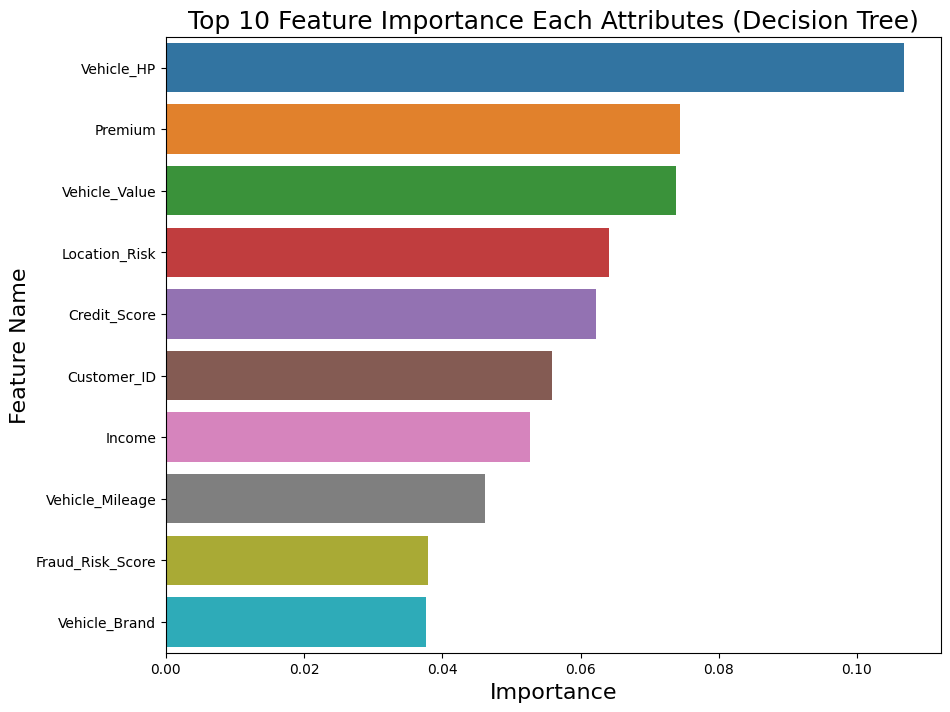

In [44]:
# Creating a DataFrame with feature names and their corresponding importance scores
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})

# Sorting the DataFrame by importance in descending order
fi = imp_df.sort_values(by="Importance", ascending=False)

# Selecting the top 10 features by importance
fi2 = fi.head(10)

# Creating a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


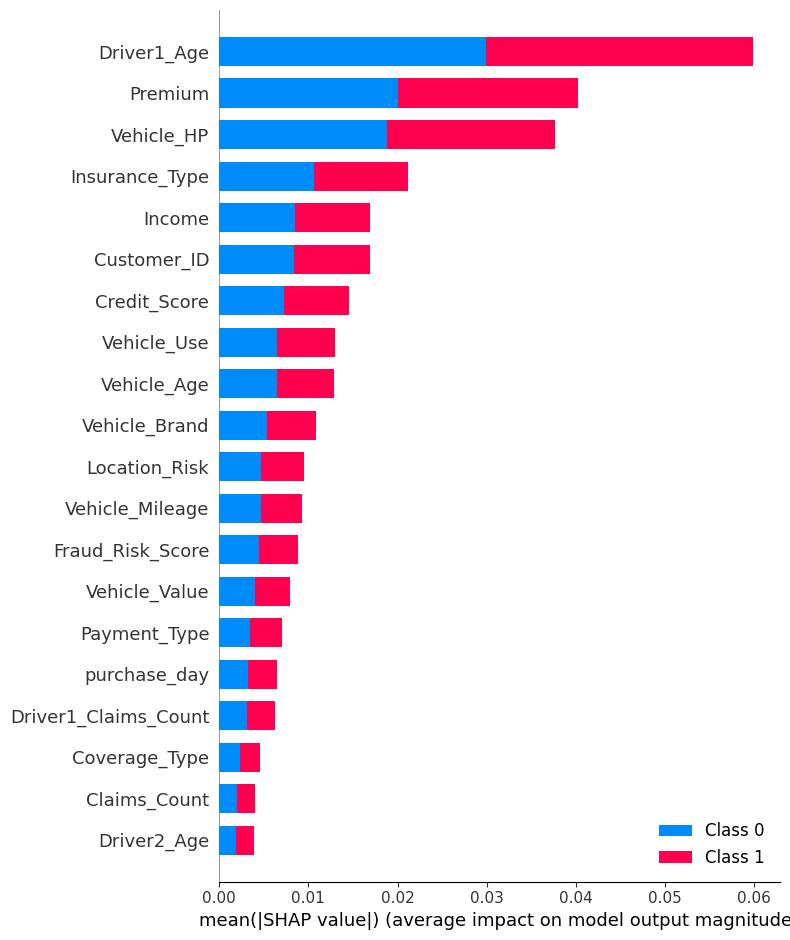

In [48]:
# Importing the SHAP library
import shap

# Creating a SHAP TreeExplainer for your Decision Tree model
explainer = shap.TreeExplainer(dtree)

# Computing SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Creating a summary plot to visualize the feature importance based on SHAP values
shap.summary_plot(shap_values, X_test)


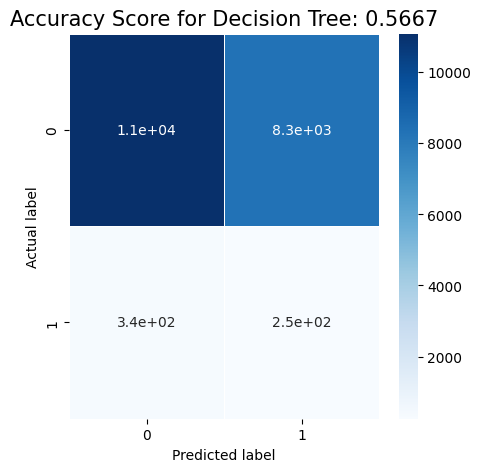

In [49]:
# Importing confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')

# Adding labels and title to the plot
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, Y_test))
plt.title(all_sample_title, size=15)

# Displaying the plot
plt.show()


[link text](https://)#Random Forest

In [ ]:
%%time
# Importing RandomForestClassifier and GridSearchCV from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating a Random Forest classifier with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced')

# Defining a dictionary of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Creating a GridSearchCV instance with RandomForestClassifier, hyperparameters, and 5-fold cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fitting the grid search to the training data
grid_search.fit(X_train, Y_train)

# Printing the best hyperparameters found by the grid search
print(grid_search.best_params_)


In [ ]:
%%time
# Importing RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier with specified hyperparameters
rfc = RandomForestClassifier(
    random_state=0,
    max_features='sqrt',
    n_estimators=200,
    class_weight='balanced'
)

# Fitting the Random Forest classifier to the training data
rfc.fit(X_train, Y_train)


In [ ]:
%%time
# Importing accuracy_score from scikit-learn
from sklearn.metrics import accuracy_score

# Making predictions using the trained Random Forest classifier
y_pred = rfc.predict(X_test)

# Calculating and printing the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", round(accuracy * 100, 2), "%")


In [ ]:
# Importing the necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

# Calculating and printing the F1 Score
f1 = f1_score(Y_test, y_pred, average='micro')
print('F-1 Score:', f1)
# F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall,
# making it suitable for imbalanced datasets. A higher F1 Score indicates better performance.

# Calculating and printing the Precision Score
precision = precision_score(Y_test, y_pred, average='micro')
print('Precision Score:', precision)
# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
# It is useful when false positives are more critical. High precision indicates a low false positive rate.

# Calculating and printing the Recall Score
recall = recall_score(Y_test, y_pred, average='micro')
print('Recall Score:', recall)
# Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations
# to the all observations in actual class. It is useful when false negatives are more critical. High recall
# indicates a low false negative rate.

# Calculating and printing the Jaccard Score (Intersection over Union)
jaccard = jaccard_score(Y_test, y_pred, average='micro')
print('Jaccard Score:', jaccard)
# Jaccard Score calculates the intersection over union of predicted and actual labels.
# It is particularly useful for multi-label classification. Higher Jaccard Score indicates better overlap.

# Calculating and printing the Log Loss
logloss = log_loss(Y_test, y_pred)
print('Log Loss:', logloss)
# Log Loss quantifies the accuracy of predicted probabilities by penalizing confident but incorrect predictions.
# A lower Log Loss indicates better calibration of predicted probabilities.



In [ ]:
# Creating a DataFrame with feature names and their corresponding importance scores
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_  # Using the decision tree's feature importances here, you might need to replace this with rfc.feature_importances_ for Random Forest
})

# Sorting the DataFrame by importance in descending order
fi = imp_df.sort_values(by="Importance", ascending=False)

# Selecting the top 10 features by importance
fi2 = fi.head(10)

# Creating a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()


In [ ]:
# Importing confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')

# Adding labels and title to the plot
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, Y_test))
plt.title(all_sample_title, size=15)

# Displaying the plot
plt.show()


#Logistic Regression

In [ ]:
%%time
# Importing LogisticRegression and GridSearchCV from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating a Logistic Regression classifier with balanced class weights
lr = LogisticRegression(class_weight='balanced')

# Defining a dictionary of hyperparameters to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Creating a GridSearchCV instance with LogisticRegression, hyperparameters, and 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fitting the grid search to the training data
grid_search.fit(X_train, Y_train)

# Printing the best hyperparameters found by the grid search
print(grid_search.best_params_)


In [ ]:
# Importing LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression classifier with specified hyperparameters
lr = LogisticRegression(C=10, penalty='l2', class_weight='balanced')

# Fitting the Logistic Regression classifier to the training data
lr.fit(X_train, Y_train)


In [ ]:
# Importing accuracy_score from scikit-learn
from sklearn.metrics import accuracy_score

# Making predictions using the trained Logistic Regression classifier
y_pred = lr.predict(X_test)

# Calculating and printing the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", round(accuracy * 100, 2), "%")


In [ ]:
# Importing the necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

# Calculating and printing the F1 Score
f1 = f1_score(Y_test, y_pred, average='micro')
print('F-1 Score:', f1)
# F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall,
# making it suitable for imbalanced datasets. A higher F1 Score indicates better performance.

# Calculating and printing the Precision Score
precision = precision_score(Y_test, y_pred, average='micro')
print('Precision Score:', precision)
# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
# It is useful when false positives are more critical. High precision indicates a low false positive rate.

# Calculating and printing the Recall Score
recall = recall_score(Y_test, y_pred, average='micro')
print('Recall Score:', recall)
# Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations
# to all observations in the actual class. It is useful when false negatives are more critical. High recall
# indicates a low false negative rate.

# Calculating and printing the Jaccard Score (Intersection over Union)
jaccard = jaccard_score(Y_test, y_pred, average='micro')
print('Jaccard Score:', jaccard)
# Jaccard Score calculates the intersection over union of predicted and actual labels.
# It is particularly useful for multi-label classification. A higher Jaccard Score indicates better overlap.

# Calculating and printing the Log Loss
logloss = log_loss(Y_test, y_pred)
print('Log Loss:', logloss)
# Log Loss quantifies the accuracy of predicted probabilities by penalizing confident but incorrect predictions.
# A lower Log Loss indicates better calibration of predicted probabilities.



In [ ]:
# Creating a DataFrame to store feature importances and their corresponding features
importance_scores = lr.coef_[0]
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importance_scores})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Creating a bar plot to visualize the feature importances
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='Blues_d')
plt.title('Feature Importance Each Attributes (Logistic Regression)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)

# Displaying the plot
plt.show()


In [ ]:
# Importing confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')

# Adding labels and title to the plot
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, Y_test))
plt.title(all_sample_title, size=15)

# Displaying the plot
plt.show()


In [ ]:
from datetime import datetime

current_time = datetime.now()
print("Current time:", current_time)

In [ ]:
from datetime import datetime

current_time = datetime.now()
print("Current time:", current_time)